# POMDP
---
POMDP is short for Partially Observable Markov Decision Problems.

In retrospect, a Markov decision process or MDP is defined as:
- a sequential decision problem for a fully observable, stochastic environment with a Markovian transition model and additive rewards.

An MDP consists of a set of states (with an initial state $s_0$); a set $A(s)$ of actions
in each state; a transition model $P(s' | s, a)$; and a reward function $R(s)$.

The MDP seeks to make sequential decisions to occupy states to maximize some combination of the reward function $R(s)$.

The characteristic problem of the MDP is hence to identify the optimal policy function $\pi^*(s)$ that provides the _utility-maximising_ action $a$ to be taken when the current state is $s$.

## Belief vector

**Note**: The book refers to the _belief vector_ as the _belief state_. We use the latter terminology here to retain our ability to refer to the belief vector as a _probability distribution over states_.

The solution of an MDP is subject to certain properties of the problem which are assumed and justified in [Section 17.1]. One critical assumption is that the agent is **fully aware of its current state at all times**.

A tedious (but rewarding, as we will see) way of expressing this is in terms of the **belief vector** $b$ of the agent. The belief vector is a function mapping states to probabilities or certainties of being in those states.

Consider an agent that is fully aware that it is in state $s_i$ in the state-space $(s_1, s_2, ... s_n)$ at the current time.

Its belief vector is the vector $(b(s_1), b(s_2), ... b(s_n))$ given by the function $b(s)$:
\begin{align*}
b(s) &= 0 \quad \text{if }s \neq s_i \\ &= 1 \quad \text{if } s = s_i
\end{align*}

Note that $b(s)$ is a probability distribution that necessarily sums to $1$ over all $s$.



## POMDPs - a conceptual outline

The POMDP really has only two modifications to the **problem formulation** compared to the MDP.

- **Belief state** - In the real world, the current state of an agent is often not known with complete certainty. This makes the concept of a belief vector extremely relevant. It allows the agent to represent different degrees of certainty with which it _believes_ it is in each state.

- **Evidence percepts** - In the real world, agents often have certain kinds of evidence, collected from sensors. They can use the probability distribution of observed evidence, conditional on state, to consolidate their information. This is a known distribution $P(e\ |\ s)$ - $e$ being an evidence, and $s$ being the state it is conditional on.

Consider the world we used for the MDP. 

![title](images/grid_mdp.jpg)

### Using the belief vector
An agent beginning at $(1, 1)$ may not be certain that it is indeed in $(1, 1)$. Consider a belief vector $b$ such that:
\begin{align*}
    b((1,1)) &= 0.8 \\
    b((2,1)) &= 0.1 \\
    b((1,2)) &= 0.1 \\
    b(s) &= 0 \quad \quad \forall \text{ other } s
\end{align*}

By horizontally catenating each row, we can represent this as an 11-dimensional vector (omitting $(2, 2)$).

Thus, taking $s_1 = (1, 1)$, $s_2 = (1, 2)$, ... $s_{11} = (4,3)$, we have $b$:

$b = (0.8, 0.1, 0, 0, 0.1, 0, 0, 0, 0, 0, 0)$ 

This fully represents the certainty to which the agent is aware of its state.

### Using evidence
The evidence observed here could be the number of adjacent 'walls' or 'dead ends' observed by the agent. We assume that the agent cannot 'orient' the walls - only count them.

In this case, $e$ can take only two values, 1 and 2. This gives $P(e\ |\ s)$ as:
\begin{align*}
    P(e=2\ |\ s) &= \frac{1}{7} \quad \forall \quad s \in \{s_1, s_2, s_4, s_5, s_8, s_9, s_{11}\}\\
    P(e=1\ |\ s) &= \frac{1}{4} \quad \forall \quad s \in \{s_3, s_6, s_7, s_{10}\} \\
    P(e\ |\ s) &= 0 \quad \forall \quad \text{ other } s, e
\end{align*}

Note that the implications of the evidence on the state must be known **a priori** to the agent. Ways of reliably learning this distribution from percepts are beyond the scope of this notebook.

## POMDPs - a rigorous outline

A POMDP is thus a sequential decision problem for a *partially* observable, stochastic environment with a Markovian transition model, a known 'sensor model' for inferring state from observation, and additive rewards. 

Practically, a POMDP has the following, which an MDP also has:
- a set of states, each denoted by $s$
- a set of actions available in each state, $A(s)$
- a reward accrued on attaining some state, $R(s)$
- a transition probability $P(s'\ |\ s, a)$ of action $a$ changing the state from $s$ to $s'$

And the following, which an MDP does not:
- a sensor model $P(e\ |\ s)$ on evidence conditional on states

Additionally, the POMDP is now uncertain of its current state hence has:
- a belief vector $b$ representing the certainty of being in each state (as a probability distribution)


### New uncertainties

It is useful to intuitively appreciate the new uncertainties that have arisen in the agent's awareness of its own state.

- At any point, the agent has a belief vector $b$, the distribution of its believed likelihood of being in each state $s$.
- For each of these states $s$ that the agent may **actually** be in, it has some set of actions given by $A(s)$.
- Each of these actions may transport it to some other state $s'$, assuming an initial state $s$, with probability $P(s'\ |\ s, a)$
- Once the action is performed, the agent receives a percept $e$. $P(e\ |\ s)$ now tells it the chances of having perceived $e$ for each state $s$. The agent must use this information to update its new belief state appropriately.

### Evolution of the belief vector - the `FORWARD` function

The new belief vector $b'(s')$ after an action $a$ on the belief vector $b(s)$ and the noting of evidence $e$ is:
$$ b'(s') = \alpha P(e\ |\ s') \sum_s P(s'\ | s, a) b(s)$$ 

where $\alpha$ is a normalizing constant (to retain the interpretation of $b$ as a probability distribution.

This equation is just counting the sum of likelihoods of going to a state $s'$ from every possible state $s$, times the initial likelihood of being in each $s$. This is multiplied by the likelihood that the known evidence actually implies the new state $s'$. 

This function is represented as `b' = FORWARD(b, a, e)`

### Probability distribution of the evolving belief vector

The goal here is to find $P(b'\ |\ b, a)$ - the probability that action $a$ transforms belief vector $b$ into belief vector $b'$. The following steps illustrate this -

The probability of observing evidence $e$ when action $a$ is enacted on belief vector $b$ can be distributed over each possible new state $s'$ resulting from it:
\begin{align*}
    P(e\ |\ b, a) &= \sum_{s'} P(e\ |\ b, a, s') P(s'\ |\ b, a) \\
                  &= \sum_{s'} P(e\ |\ s') P(s'\ |\ b, a) \\
                  &= \sum_{s'} P(e\ |\ s') \sum_s P(s'\ |\ s, a) b(s)
\end{align*}

The probability of getting belief vector $b'$ from $b$ by application of action $a$ can thus be summed over all possible evidence $e$:
\begin{align*}
    P(b'\ |\ b, a) &= \sum_{e} P(b'\ |\ b, a, e) P(e\ |\ b, a) \\
                  &= \sum_{e} P(b'\ |\ b, a, e) \sum_{s'} P(e\ |\ s') \sum_s P(s'\ |\ s, a) b(s)
\end{align*}

where $P(b'\ |\ b, a, e) = 1$ if $b' = $ `FORWARD(b, a, e)` and $= 0$ otherwise.

Given initial and final belief states $b$ and $b'$, the transition probabilities still depend on the action $a$ and observed evidence $e$. Some belief states may be achievable by certain actions, but have non-zero probabilities for states prohibited by the evidence $e$. Thus, the above condition thus ensures that only valid combinations of $(b', b, a, e)$ are considered.

### A modified reward space

For MDPs, the reward space was simple - one reward per available state. However, for a belief vector $b(s)$, the expected reward is now:
$$\rho(b) = \sum_s b(s) R(s)$$

Thus, as the belief vector can take infinite values of the distribution over states, so can the reward for each belief vector vary over a hyperplane in the belief space, or space of states (planes in an $N$-dimensional space are formed by a linear combination of the axes).

Now that we know the basics, let's have a look at the `POMDP` class.

In [1]:
import os, sys
sys.path = [os.path.abspath("../../")] + sys.path
from mdp4e import *
from notebook4e import psource, pseudocode, plot_pomdp_utility
psource(POMDP)

The `POMDP` class includes all variables of the `MDP` class and additionally also stores the sensor model in `e_prob`.
<br>
<br>
`remove_dominated_plans`, `remove_dominated_plans_fast`, `generate_mapping` and `max_difference` are helper methods for `pomdp_value_iteration` which will be explained shortly.

To understand how we can model a partially observable MDP, let's take a simple example.
Let's consider a simple two state world.
The states are labeled 0 and 1, with the reward at state 0 being 0 and at state 1 being 1.
<br>
There are two actions:
<br>
`Stay`: stays put with probability 0.9 and
`Go`: switches to the other state with probability 0.9.
<br>
For now, let's assume the discount factor `gamma` to be 1.
<br>
The sensor reports the correct state with probability 0.6.
<br>
This is a simple problem with a trivial solution.
Obviously, the agent should `Stay` when it thinks it is in state 1 and `Go` when it thinks it is in state 0.
<br>
The belief space can be viewed as one-dimensional because the two probabilities must sum to 1.

Let's model this POMDP using the `POMDP` class.

In [2]:
# transition probability P(s'|s,a)
t_prob = [[[0.9, 0.1], [0.1, 0.9]], [[0.1, 0.9], [0.9, 0.1]]]
# evidence function P(e|s)
e_prob = [[[0.6, 0.4], [0.4, 0.6]], [[0.6, 0.4], [0.4, 0.6]]]
# reward function
rewards = [[0.0, 0.0], [1.0, 1.0]]
# discount factor
gamma = 0.95
# actions
actions = ('0', '1')
# states
states = ('0', '1')

In [3]:
pomdp = POMDP(actions, t_prob, e_prob, rewards, states, gamma)

Now we have defined our `POMDP` object.

## POMDP VALUE ITERATION
Defining a POMDP is useless unless we can find a way to solve it. As POMDPs can have infinitely many belief states, we cannot calculate one utility value for each state as we did in `value_iteration` for MDPs.
<br>
Instead of thinking about policies, we should think about conditional plans and how the expected utility of executing a fixed conditional plan varies with the initial belief state.
<br>
If we bound the depth of the conditional plans, then there are only finitely many such plans and the continuous space of belief states will generally be divided inte _regions_, each corresponding to a particular conditional plan that is optimal in that region. The utility function, being the maximum of a collection of hyperplanes, will be piecewise linear and convex.
<br>
For the one-step plans `Stay` and `Go`, the utility values are as follows
<br>
<br>
$$\alpha_{|Stay|}(0) = R(0) + \gamma(0.9R(0) + 0.1R(1)) = 0.1$$
$$\alpha_{|Stay|}(1) = R(1) + \gamma(0.9R(1) + 0.1R(0)) = 1.9$$
$$\alpha_{|Go|}(0) = R(0) + \gamma(0.9R(1) + 0.1R(0)) = 0.9$$
$$\alpha_{|Go|}(1) = R(1) + \gamma(0.9R(0) + 0.1R(1)) = 1.1$$

The utility function can be found by `pomdp_value_iteration`.
<br>
To summarize, it generates a set of all plans consisting of an action and, for each possible next percept, a plan in U with computed utility vectors.
The dominated plans are then removed from this set and the process is repeated until the maximum difference between the utility functions of two consecutive iterations reaches a value less than a threshold value.

In [ ]:
pseudocode('POMDP-Value-Iteration')

Let's have a look at the `pomdp_value_iteration` function.

In [ ]:
psource(pomdp_value_iteration)

Let's try solving a simple one-dimensional POMDP using value-iteration.
<br>
Consider the problem of a user listening to voicemails.
At the end of each message, they can either _save_ or _delete_ a message.
This forms the unobservable state _S = {save, delete}_.
It is the task of the POMDP solver to guess which goal the user has.
<br>
The belief space has two elements, _b(s = save)_ and _b(s = delete)_.
For example, for the belief state _b = (1, 0)_, the left end of the line segment indicates _b(s = save) = 1_ and _b(s = delete) = 0_.
The intermediate points represent varying degrees of certainty in the user's goal.
<br>
The machine has three available actions: it can _ask_ what the user wishes to do in order to infer his or her current goal, or it can _doSave_ or _doDelete_ and move to the next message.
If the user says _save_, then an error may occur with probability 0.2, whereas if the user says _delete_, an error may occur with a probability 0.3.
<br>
The machine receives a large positive reward (+5) for getting the user's goal correct, a very large negative reward (-20) for taking the action _doDelete_ when the user wanted _save_, and a smaller but still significant negative reward (-10) for taking the action _doSave_ when the user wanted _delete_. 
There is also a small negative reward for taking the _ask_ action (-1).
The discount factor is set to 0.95 for this example.
<br>
Let's define the POMDP.

In [5]:
# transition function P(s'|s,a)
t_prob = [[[0.65, 0.35], [0.65, 0.35]], [[0.65, 0.35], [0.65, 0.35]], [[1.0, 0.0], [0.0, 1.0]]]
# evidence function P(e|s)
e_prob = [[[0.5, 0.5], [0.5, 0.5]], [[0.5, 0.5], [0.5, 0.5]], [[0.8, 0.2], [0.3, 0.7]]]
# reward function
rewards = [[5, -10], [-20, 5], [-1, -1]]

gamma = 0.95
actions = ('0', '1', '2')
states = ('0', '1')

pomdp = POMDP(actions, t_prob, e_prob, rewards, states, gamma)

We have defined the `POMDP` object.
Let's run `pomdp_value_iteration` to find the utility function.

In [6]:
utility = pomdp_value_iteration(pomdp, epsilon=0.1)

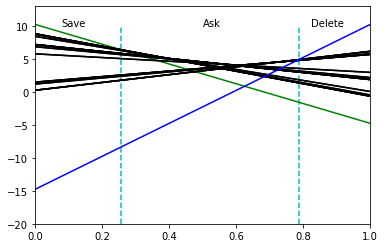

In [7]:
%matplotlib inline
plot_pomdp_utility(utility)